In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,louis,dave,jim,joe,john,mike
aaaaah,0,0,1,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0
aah,0,0,0,3,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0


In [2]:
#lets check top 30 words from each comedian

top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index,top.values))
    
top_dict


{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('time', 19),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('god', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('right', 18),
  ('grandma', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('good', 16),
  ('did', 16),
  ('yeah', 16),
  ('jokes', 16),
  ('school', 16),
  ('baby', 15),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15)],
 

In [3]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, oh, gotta, wanna
---
anthony
im, like, know, dont, joke, got, thats, said, anthony, just, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, hes, gonna, cause, theres
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
jim
like, im, dont, right, fucking, know, went, just, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
---
mike
like, im, know, said, just, dont, thats, think, says, cause, right, jenny, goes, id
---


In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for word, count in top_dict[comedian]]
    for t in top:
        words.append(t)
   

        

In [5]:
#lets check the most common words repeated across all comedians and aggregate the result
t = Counter(words).most_common()
t

# If more than half of the comedians have it as a top word, exclude it from the list
add_stopWords = [w for w,c in t if c>5]

add_stopWords

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'gonna',
 'got',
 'time',
 'think',
 'cause',
 'really']

In [6]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer as cv

#read in the earlier saved corpus.pkl file
clean_corpus = pd.read_pickle('corpus.pkl')

#lets now add the additional stop words 

stop_words = text.ENGLISH_STOP_WORDS.union(add_stopWords)

#now lets recreate dtm

cv = cv(stop_words=stop_words)
data_cv = cv.fit_transform(clean_corpus.trans)
dtm2 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dtm2.index = data.transpose().index
dtm2



,aaaaah,aaah,aah,abc,abcs,able,ablebodied,abortion,abortions,abroad,...,yyou,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,éclair
ali,0,0,0,1,0,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
louis,0,0,3,0,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
dave,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,1,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0


In [7]:
#Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
dtm2.to_pickle("dtm2.pkl")



In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: 

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


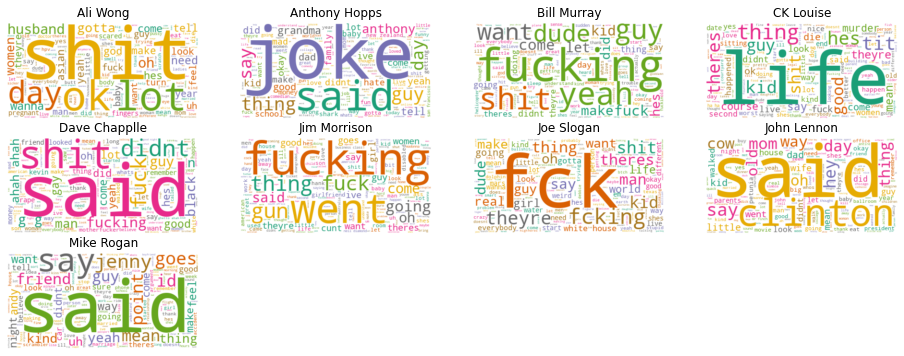

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]


full_names = ['Ali Wong','Anthony Hopps','Bill Murray','CK Louise',
              'Dave Chapplle','Jim Morrison','Joe Slogan', 'John Lennon','Mike Rogan']
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(clean_corpus.trans[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Findings -
 1. Ali wong says shit alot!
 2. Lot of others use f-word a lot. We can check that later!

In [12]:
#lets find the number of unique words each comedian uses
#Meaning- lets identify the non-zero items in the document-term matrix, meaning that the word occurs at least once

uniq_words = []
data2 = dtm2.transpose()

for comedian in data2.columns:
    uniques = data2[comedian].to_numpy().nonzero()[0].size
    uniq_words.append(uniques)
    
data_words = pd.DataFrame(list(zip(full_names, uniq_words)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort



,comedian,unique_words
1,Anthony Hopps,968
3,CK Louise,1083
5,Jim Morrison,1298
0,Ali Wong,1326
4,Dave Chapplle,1370
7,John Lennon,1384
6,Joe Slogan,1419
8,Mike Rogan,1478
2,Bill Murray,1618


In [25]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses

tot_words = []
for comedians in data2.columns:
    totals = sum(data2[comedians])
    tot_words.append(totals)

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62]

#lets calc. words per minute
#lets add some columns to our data frame

data_words['Total Words'] = tot_words
data_words['Total Run Time'] = run_times
data_words['Words per min'] = data_words['Total Words']/data_words['Total Run Time']

data_words.rename(columns={'Words per min': 'Words_per_min'}, inplace=True)
data_words


# Sort the dataframe by words per minute to see who talks the slowest and fastest

data_wpm = data_words.sort_values(by = 'Words_per_min')
data_wpm= data_wpm.drop('Words/min',1)
data_wpm

C:\Users\91872\AppData\Local\Temp/ipykernel_10216/3298796764.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_wpm= data_wpm.drop('Words/min',1)


,comedian,unique_words,Total Words,Total Run Time,Words_per_min
1,Anthony Hopps,968,2502,59,42.406780
3,CK Louise,1083,2661,60,44.350000
0,Ali Wong,1326,2687,60,44.783333
6,Joe Slogan,1419,3727,77,48.402597
4,Dave Chapplle,1370,3503,67,52.283582
7,John Lennon,1384,3384,63,53.714286
5,Jim Morrison,1298,3979,73,54.506849
2,Bill Murray,1618,4375,80,54.687500
8,Mike Rogan,1478,3777,62,60.919355


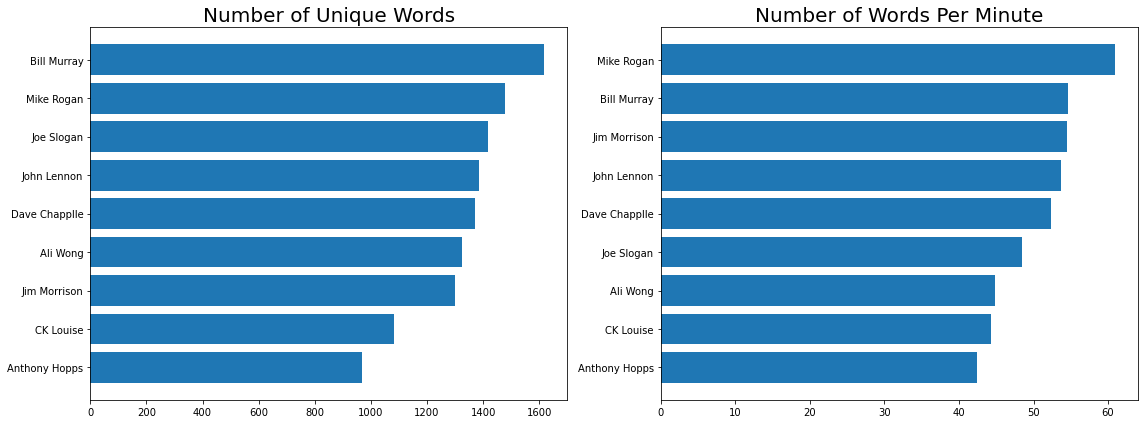

In [26]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm.Words_per_min, align='center')
plt.yticks(y_pos, data_wpm.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# Profanity Analysis -

In [36]:
# lets calc number of f-words & s-words spoken by each comedians
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()[1]

('im', 9)

In [33]:
data_bad_words = data2.transpose()[['fucking','fck', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fck + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
louis,21,25
dave,65,46
jim,115,20
joe,66,40
john,4,6
mike,0,0


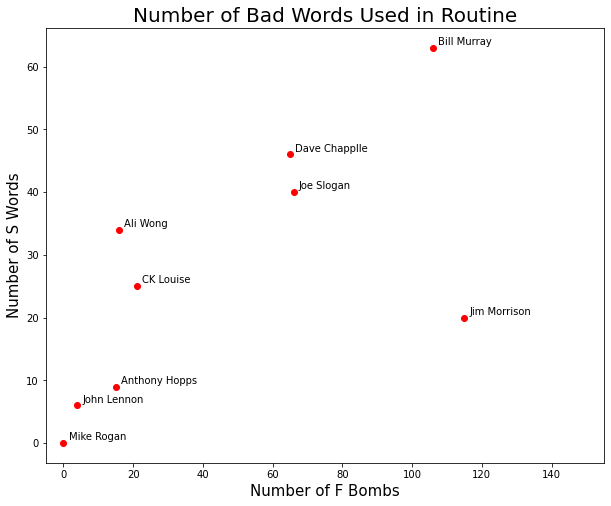

In [41]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

In [42]:
data2

,ali,anthony,bill,louis,dave,jim,joe,john,mike
aaaaah,0,0,1,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0
aah,0,0,0,3,0,0,0,0,0
abc,1,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
zillion,0,0,1,0,0,0,0,0,0
zombie,1,0,1,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0
